<a href="https://colab.research.google.com/github/namanshetty25/Heart-Disease-Prediction-Model-Training/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as  pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import LogisticRegression

In [ ]:
data=pd.read_csv("dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
corr_matrix=data.select_dtypes(include=['number'])
corr_matrix=corr_matrix.corr()
corr_matrix["DEATH_EVENT"].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

In [ ]:
X=data.drop(columns=['DEATH_EVENT'])
y=data["DEATH_EVENT"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)


In [ ]:
X_train.shape, X_test.shape


((224, 12), (75, 12))

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create GaussianNB model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train, y_train)  # X_train: Features, y_train: Labels

# Make predictions
y_pred = gnb_model.predict(X_test)

# Evaluate the model (example: accuracy)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8533333333333334


In [ ]:
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8533333333333334


In [ ]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.9066666666666666


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=200,random_state=42)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', accuracy_score(y_test, y_pred))


Accuracy of the model is = 0.9066666666666666


In [ ]:
models = [
    ('Random Forest', rf_model),
    ('XGBoost', xgb_model),
    ('Logistic Regression', lr_model),
    ('GaussianNB', gnb_model)
]


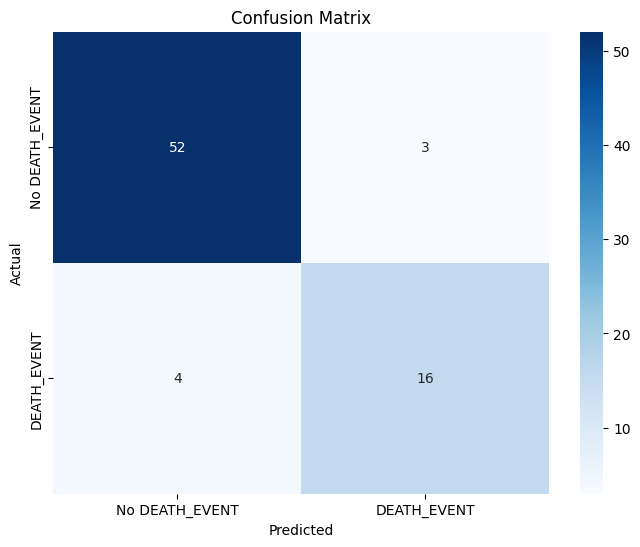

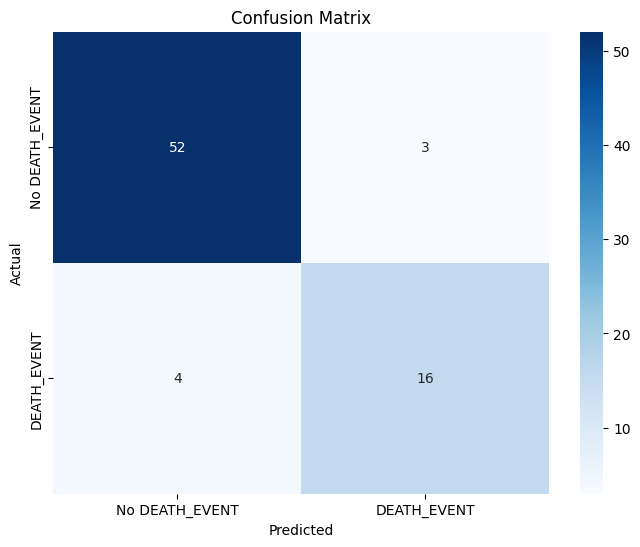

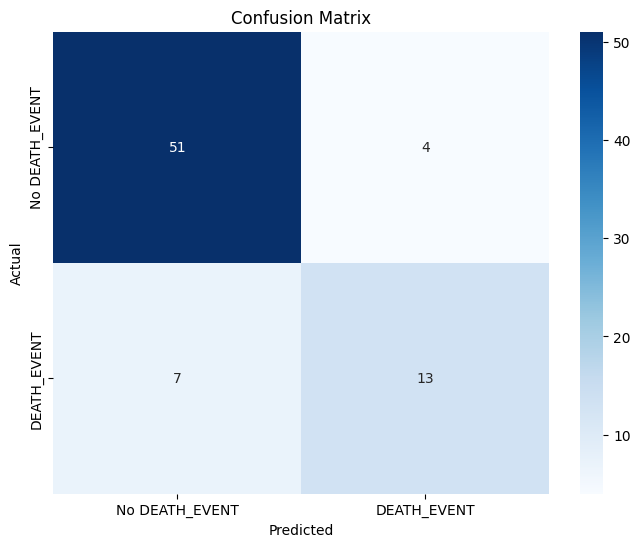

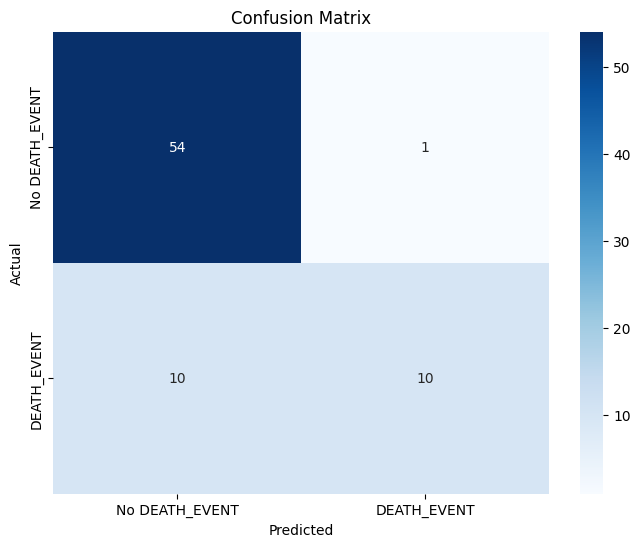

,Model,Accuracy (%),Precision,Recall,F1 score
0,Random Forest,90.666667,0.842105,0.80,0.820513
1,XGBoost,90.666667,0.842105,0.80,0.820513
2,Logistic Regression,85.333333,0.764706,0.65,0.702703
3,GaussianNB,85.333333,0.909091,0.50,0.645161


In [ ]:
from sklearn.metrics import  classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score
metrics_list=[]
for model_name, model in models:
    # Make predictions and get probabilities
    y_pred = model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    # Calculate Accuracy (%)
    accuracy_percent = accuracy * 100
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    # Append the metrics to the list
    metrics_list.append([model_name, accuracy_percent,precision,recall,f1])
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No DEATH_EVENT', 'DEATH_EVENT'], yticklabels=['No DEATH_EVENT', 'DEATH_EVENT'])

    # Set the title and labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Preview the plot
    plt.show()

# Convert the list to a DataFrame
metrics_df = pd.DataFrame(metrics_list, columns=['Model', 'Accuracy (%)','Precision','Recall','F1 score'])

# Display the metrics table
metrics_df

In [ ]:
import keras as keras
from keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model = Sequential([
    Dense(1,activation='sigmoid')  # Output layer for regression
])



In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test))


y_prednn=model.predict(X_test)




Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3573 - loss: 85398.8281 - val_accuracy: 0.2667 - val_loss: 99607.6172
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3261 - loss: 86062.3438 - val_accuracy: 0.2667 - val_loss: 96809.1406
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3861 - loss: 77734.5625 - val_accuracy: 0.2667 - val_loss: 94049.8906
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4072 - loss: 70943.7109 - val_accuracy: 0.2667 - val_loss: 91306.3359
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3589 - loss: 76231.1719 - val_accuracy: 0.2667 - val_loss: 88476.7734
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3462 - loss: 77739.6484 - val_accuracy: 0.2667 - val_loss: 85634.7578
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3191 - loss: 76234.8203 - val_accuracy: 0.2667 - val_loss: 82856.9688
Epoch 8/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - a

In [ ]:
y_prednn.reshape(1,-1)

array([[1.36984198e-19, 1.00000000e+00, 1.00000000e+00, 9.18494013e-12,
        1.37274797e-15, 1.96524258e-18, 1.07720002e-35, 5.38863754e-03,
        9.65444624e-01, 9.99887645e-01, 7.97818939e-05, 1.35495773e-11,
        7.29731202e-01, 2.14108859e-15, 8.06243588e-06, 1.55827619e-16,
        2.55418136e-17, 1.00000000e+00, 7.60536665e-08, 7.45325983e-01,
        6.59544767e-22, 7.56167856e-06, 1.00000000e+00, 1.91223880e-05,
        3.56705335e-04, 9.92844462e-01, 1.10322759e-07, 3.08189101e-27,
        1.44415297e-08, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.65709630e-01, 3.64086799e-13, 9.76745068e-05, 6.14604915e-06,
        5.27246181e-25, 6.12516602e-13, 3.88045507e-09, 4.01066814e-07,
        1.00000000e+00, 6.60639345e-32, 2.48795694e-13, 7.90043187e-23,
        1.19451841e-03, 2.83681129e-06, 3.26403155e-10, 2.89393634e-01,
        1.00000000e+00, 1.24729745e-01, 8.96512508e-01, 9.27806369e-24,
        1.97010637e-11, 8.50543032e-08, 8.21474711e-14, 9.999914

In [ ]:
for i in range(len(y_pred)):
    if(y_prednn[i]>=0.5):
        y_prednn[i]=1
    elif(y_prednn[i]<0.5):
        y_prednn[i]=0



In [ ]:
y_prednn.reshape(1,-1)

array([[0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', accuracy_score(y_test, y_prednn))
accuracy_percent=accuracy_score(y_test, y_prednn)

Accuracy of the model is = 0.6933333333333334


In [ ]:
y_test.values

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [ ]:
metrics_list.append(["Neural Network", accuracy_percent*100])

# Convert the list to a DataFrame
metrics_df = pd.DataFrame(metrics_list, columns=['Model', 'Accuracy (%)'])

# Display the metrics table
metrics_df

,Model,Accuracy (%)
0,Random Forest,90.666667
1,XGBoost,90.666667
2,Logistic Regression,85.333333
3,GaussianNB,85.333333
4,Neural Network,69.333333
